In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Dataset 3

In [2]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6', 'Charges']
input_cols = ['FT1', 'FT2', 'FT3', 'FT4', 'FT5', 'FT6']

charges_idx = cols.index('Charges')

y_ = data3[:, charges_idx]

data3_copy = np.copy(data3)
data3_copy = np.delete(data3_copy, charges_idx, 1)

X_ = data3_copy

### Visualize the Data

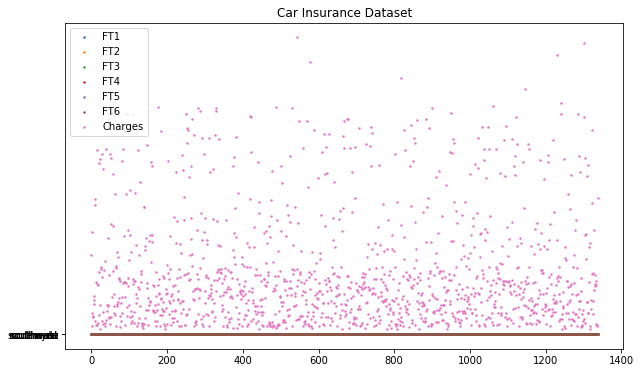

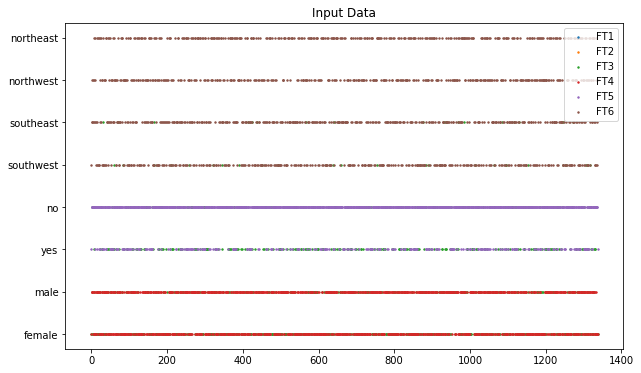

In [3]:
for idx, col in enumerate(cols):
    feature = data3[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Car Insurance Dataset')
plt.legend()
plt.show()

for idx, col in enumerate(input_cols):
    feature = X_[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col,  s=2)
    
plt.title('Input Data')
plt.legend()
plt.show()

## Feature Preprocessing

### One-hot Encoding on Features ft4, ft5, and ft6

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

onehot_enc = OneHotEncoder()
data3_to_onehot_enc = data3[:, 3:6] 
data3_onehot_encoded = onehot_enc.fit_transform(data3_to_onehot_enc).toarray()

X_onehot_encoded = np.copy(X_)
X_onehot_encoded = np.delete(X_onehot_encoded, np.s_[3:6], axis=1)

X_onehot_encoded = np.concatenate((X_onehot_encoded, data3_onehot_encoded), axis=1)

### Linear Regression, One-hot Encoding

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_1, y_2):
    return np.sqrt(mean_squared_error(y_1, y_2))

In [6]:
model = LinearRegression()

X = X_onehot_encoded
y = y_

kf = KFold(n_splits=10, shuffle = True)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 6037.855211916833
RMSE Testing average  = 6053.398037662336
RMSE overall = 6041.6796511744515


### Plot fitted values

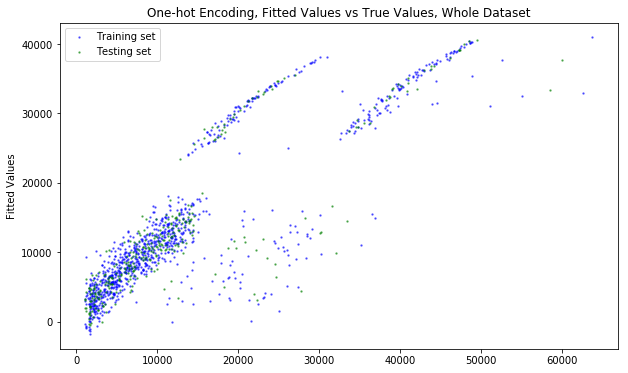

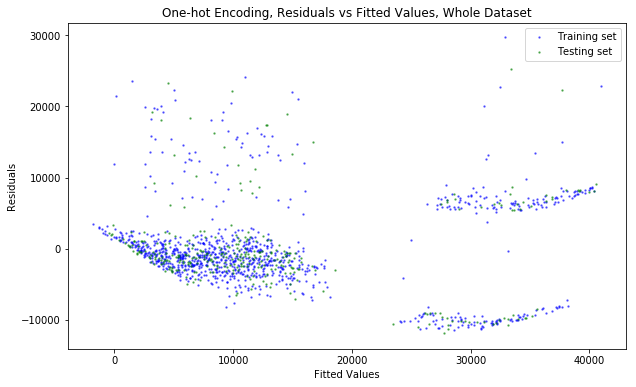

In [7]:
X = X_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), -model.predict(X_train) + y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), -model.predict(X_test) + y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

### Standardization on numerical features (ft 1, ft2, ft3)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data3_to_scale = data3[:, 0:3]
data3_standardized = scaler.fit_transform(data3_to_scale)

X_scaled_onehot_encoded = np.copy(X_onehot_encoded)
X_scaled_onehot_encoded = np.delete(X_scaled_onehot_encoded, np.s_[0:3], axis=1)
X_scaled_onehot_encoded = np.concatenate((data3_standardized, X_scaled_onehot_encoded), axis=1)

/Users/dmwang626/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/dmwang626/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Linear Regression, Standardization

In [9]:
model = LinearRegression()

X = X_scaled_onehot_encoded
y = y_

kf = KFold(n_splits=10, shuffle = True)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0 
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 6038.713637993998
RMSE Testing average  = 6055.5911876537275
RMSE overall = 6041.6796511744515


### Plot fitted values


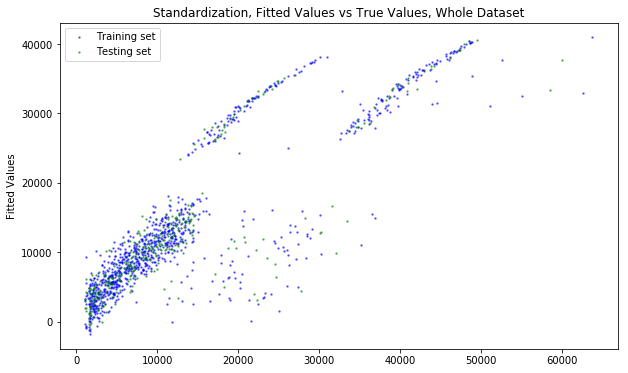

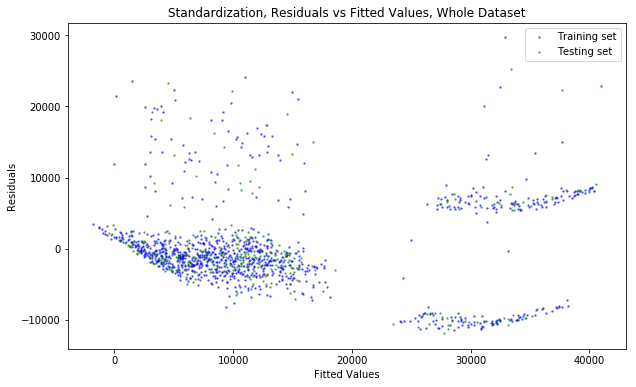

In [10]:
X = X_scaled_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Standardization, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), -model.predict(X_train) + y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), -model.predict(X_test) + y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Standardization, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

### Feature Division

In [11]:
data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

data3_division = data3[:,0]

for i in range(len(data3_division)):
    if data3[i,0] < 30:
        data3_division[i] = 1
    elif data3[i,0] > 50:
        data3_division[i] = 3
    else:
        data3_division[i] = 2

data3_division = data3_division[:, np.newaxis]      

X_division_scaled_onehot_encoded = np.copy(X_scaled_onehot_encoded)
X_division_scaled_onehot_encoded = np.delete(X_division_scaled_onehot_encoded, 0, axis=1)
X_division_scaled_onehot_encoded = np.concatenate((data3_division, X_division_scaled_onehot_encoded), axis=1)

data3 = pd.read_csv('datasets/insurance_data.csv')
data3 = np.asarray(data3)

### Linear Regression, Feature Division

In [12]:
model = LinearRegression()

X = X_division_scaled_onehot_encoded
y = y_

kf = KFold(n_splits=10, shuffle = True)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 6196.827065557785
RMSE Testing average  = 6202.299307281715
RMSE overall = 6200.176291214307


### Plot fitted values

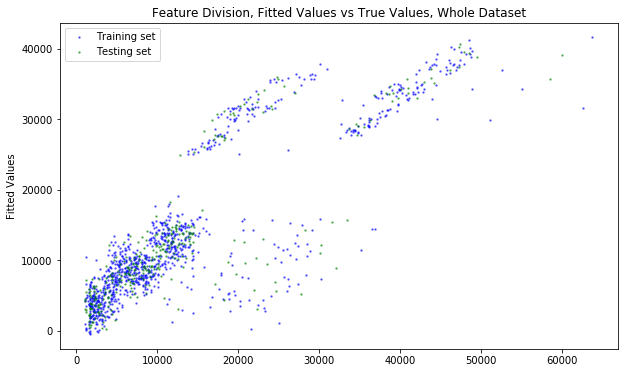

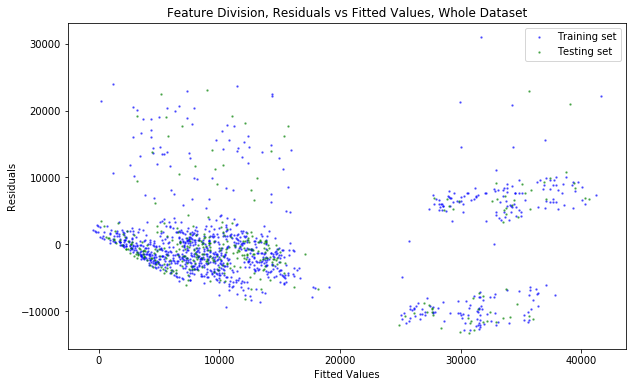

In [13]:
X = X_division_scaled_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Feature Division, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), -model.predict(X_train) + y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), -model.predict(X_test) + y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Feature Division, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

### Question 2: Correlation Exploration

#### Convert each categorical feature (ft4, ft5, ft6) to a one dimensional numerical value

In [14]:
ft4_one_dim = np.zeros(len(X_))[:, np.newaxis]
ft5_one_dim = np.zeros(len(X_))[:, np.newaxis]
ft6_one_dim = np.zeros(len(X_))[:, np.newaxis]

fts_one_dim = X_[:, 0:3]

for i in range(len(X_)):
    if X_[i,3] == 'female':
        ft4_one_dim[i] = 0
    if X_[i,3] == 'male':
        ft4_one_dim[i] = 1
    if X_[i,4] == 'no':
        ft5_one_dim[i] = 0
    if X_[i,4] == 'yes':
        ft5_one_dim[i] = 1
    if X_[i,5] == 'northeast':
        ft6_one_dim[i] = 0
    if X_[i,5] == 'northwest':
        ft6_one_dim[i] = 1
    if X_[i,5] == 'southeast':
        ft6_one_dim[i] = 2
    if X_[i,5] == 'southwest':
        ft6_one_dim[i] = 3

fts_one_dim = np.concatenate((fts_one_dim, ft4_one_dim), axis=1)        
fts_one_dim = np.concatenate((fts_one_dim, ft5_one_dim), axis=1)        
fts_one_dim = np.concatenate((fts_one_dim, ft6_one_dim), axis=1)

#### Use f_regression and mutual information regression to select two most important variables

In [15]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
import heapq

y_tests = y_.astype(float)
fts_one_dim.astype(float)

f_regression_scores = f_regression(fts_one_dim, y_tests)
mutual_info_scores = mutual_info_regression(fts_one_dim, y_tests)

print('F Regression Scores: {}'.format(np.round(f_regression_scores[0], 1)))
two_largest_freg_scores = heapq.nlargest(2, f_regression_scores[0])
print('Two Largest F Regression Scores: {}'.format(np.round(heapq.nlargest(2, f_regression_scores[0]), 4)))
print('Mutual Information Scores: {}'.format(np.round(mutual_info_scores, 4)))
two_largest_mi_scores = heapq.nlargest(2, mutual_info_scores)
print('Two Largest Mutual Information Scores: {}'.format(np.round(heapq.nlargest(2, mutual_info_scores), 4)))

F Regression Scores: [1.3120e+02 5.4700e+01 6.2000e+00 4.4000e+00 2.1776e+03 1.0000e-01]
Two Largest F Regression Scores: [2177.6149  131.174 ]
Mutual Information Scores: [1.4962 0.0734 0.1612 0.1767 0.3692 0.0757]
Two Largest Mutual Information Scores: [1.4962 0.3692]


#### Scatter plot charges vs ft2, color points based on ft5

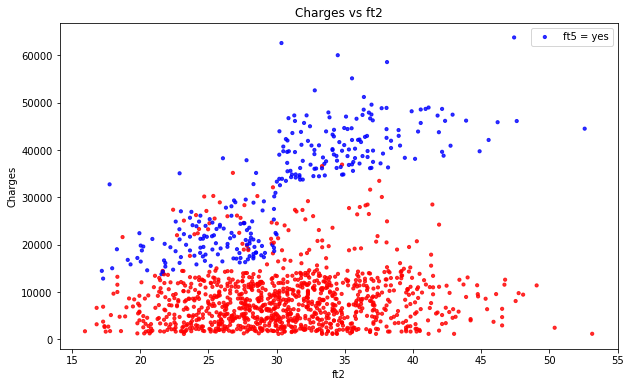

In [16]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,1], y_, c=ft5_color, s=10, alpha=0.8)
plt.title('Charges vs ft2')
plt.xlabel('ft2')
plt.ylabel('Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

#### Scatter plot charges vs ft1, color points based on ft5

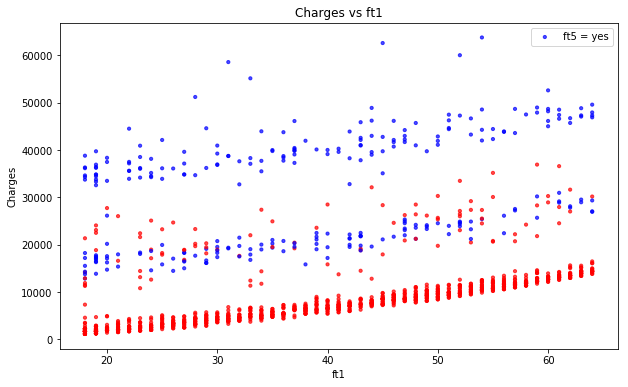

In [17]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,0], y_, c=ft5_color, s=10, alpha=0.7)
plt.title('Charges vs ft1')
plt.xlabel('ft1')
plt.ylabel('Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

### Question 3: Modify the Target Variable

#### Fitting Log($y$)

In [18]:
import math

y_log = np.asarray([math.log(num) for num in y_]) # fit to log(y)

In [19]:
# Use one-hot encoding preprocessing

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

onehot_enc = OneHotEncoder()
data3_to_onehot_enc = data3[:, 3:6]
data3_onehot_encoded = onehot_enc.fit_transform(data3_to_onehot_enc).toarray()

X_onehot_encoded = np.copy(X_)
X_onehot_encoded = np.delete(X_onehot_encoded, np.s_[3:6], axis=1)

X_onehot_encoded = np.concatenate((X_onehot_encoded, data3_onehot_encoded), axis=1)

### Linear Regression Log(y)

In [20]:
# Train linear regression model on the log(y) data
# Calc difference between exp(log(y)) and y

model = LinearRegression()

X = X_division_scaled_onehot_encoded
y = y_log
ytrue = y_

kf = KFold(n_splits=10, shuffle = True)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    y_train_nolog, y_test_nolog = ytrue[trainset], ytrue[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train_nolog, np.exp(model.predict(X_train))))
    rmse_per_fold_test.append(rmse(y_test_nolog, np.exp(model.predict(X_test))))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(np.exp(model.predict(X)), y_)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 8142.868832634352
RMSE Testing average  = 8128.880699161567
RMSE overall = 8144.785798427831


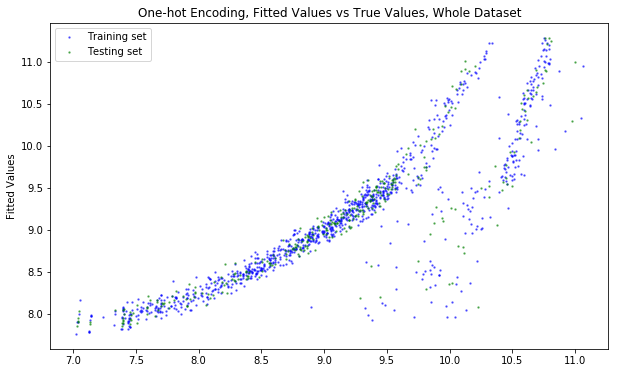

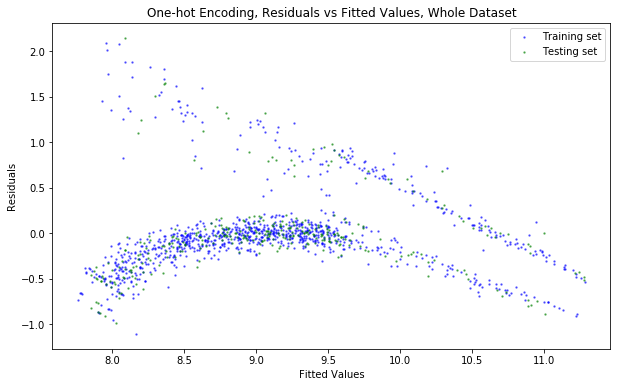

In [21]:
# Plot the results

X = X_onehot_encoded
y = y_log

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), -model.predict(X_train) + y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), -model.predict(X_test) + y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

#### Use f_regression and mutual information regression to select two most important variables

In [22]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
import heapq

y_tests = y_log.astype(float)
fts_one_dim.astype(float)

f_regression_scores = f_regression(fts_one_dim, y_tests)
mutual_info_scores = mutual_info_regression(fts_one_dim, y_tests)

print('F Regression Scores: {}'.format(np.round(f_regression_scores[0], 1)))
two_largest_freg_scores = heapq.nlargest(2, f_regression_scores[0])
print('Two Largest F Regression Scores: {}'.format(np.round(heapq.nlargest(2, f_regression_scores[0]), 4)))
print('Mutual Information Scores: {}'.format(np.round(mutual_info_scores, 4)))
two_largest_mi_scores = heapq.nlargest(2, mutual_info_scores)
print('Two Largest Mutual Information Scores: {}'.format(np.round(heapq.nlargest(2, mutual_info_scores), 4)))

F Regression Scores: [ 516.    23.9   35.7    0.  1062.1    2.4]
Two Largest F Regression Scores: [1062.1239  515.9771]
Mutual Information Scores: [1.4988 0.0684 0.161  0.1763 0.3694 0.0775]
Two Largest Mutual Information Scores: [1.4988 0.3694]


#### Scatter plot charges vs ft2, color points based on ft5

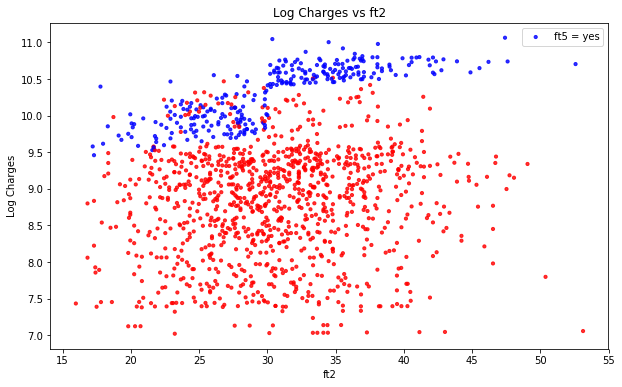

In [23]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,1], y_log, c=ft5_color, s=10, alpha=0.8)
plt.title('Log Charges vs ft2')
plt.xlabel('ft2')
plt.ylabel('Log Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

#### Scatter plot charges vs ft1, color points based on ft5


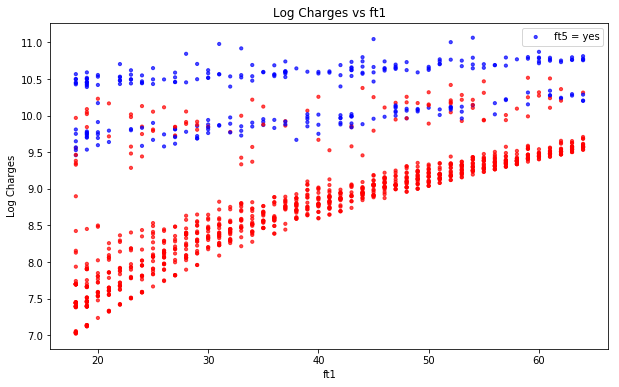

In [24]:
ft5_color = np.empty((len(X_)), dtype = str)
for i in range((len(X_))):
    if ft5_one_dim[i] == 0:
        ft5_color[i] = "r"
    if ft5_one_dim[i] == 1:
        ft5_color[i] = "b"
    
plt.scatter(X_[:,0], y_log, c=ft5_color, s=10, alpha=0.7)
plt.title('Log Charges vs ft1')
plt.xlabel('ft1')
plt.ylabel('Log Charges')
plt.legend(['ft5 = yes', 'ft5 = no'])
plt.show()

## Bonus Questions

### Feature Encoding Combinations

### One-hot Encoding and then Polynomial features

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
degrees = np.arange(2, 11)

In [27]:
model = LinearRegression()

y = y_

kf = KFold(n_splits=10, shuffle = True)
rmse_per_fold_train = []
rmse_per_fold_test = []

for d in degrees:    
    pf = PolynomialFeatures(d)
    X = pf.fit_transform(X_onehot_encoded)
    i = 0
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#         print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#         print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
        i = i + 1

    rmse_avg_train = np.average(rmse_per_fold_train)
    rmse_avg_test = np.average(rmse_per_fold_test)

    print('--')
    print('Polynomial degree = {}'.format(d))
    print('RMSE Training average = {}'.format(rmse_avg_train))
    print('RMSE Testing average  = {}'.format(rmse_avg_test))

    model.fit(X, y)
    rmse_val = rmse(model.predict(X), y)
    print('RMSE overall = {}'.format(rmse_val))

--
Polynomial degree = 2
RMSE Training average = 5728.247018748015
RMSE Testing average  = 5924.090297689701
RMSE overall = 6241.529301591419
--
Polynomial degree = 3
RMSE Training average = 5947.456808589015
RMSE Testing average  = 6367.231946665188
RMSE overall = 8301.685962720429
--
Polynomial degree = 4
RMSE Training average = 5395.483283645189
RMSE Testing average  = 6086.343037334687
RMSE overall = 4337.473710584134
--
Polynomial degree = 5
RMSE Training average = 4978.927835436068
RMSE Testing average  = 7675.346602798081
RMSE overall = 3827.570385131989
--
Polynomial degree = 6
RMSE Training average = 4580.010998550695
RMSE Testing average  = 1534590.9112614172
RMSE overall = 3175.52866831643
--
Polynomial degree = 7
RMSE Training average = 4223.972944359504
RMSE Testing average  = 3012555.6455986104
RMSE overall = 2631.7097873121506
--
Polynomial degree = 8
RMSE Training average = 3909.2484902018023
RMSE Testing average  = 5309386.529812535
RMSE overall = 2204.2006729569016
--

### Scalar Encoding then Polynomial Features

In [28]:
model = LinearRegression()

y = y_

kf = KFold(n_splits=10, shuffle = True)
rmse_per_fold_train = []
rmse_per_fold_test = []

for d in degrees:    
    pf = PolynomialFeatures(d)
    X = pf.fit_transform(X_scaled_onehot_encoded)
    i = 0
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#         print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#         print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
        i = i + 1

    rmse_avg_train = np.average(rmse_per_fold_train)
    rmse_avg_test = np.average(rmse_per_fold_test)

    print('--')
    print('Polynomial degree = {}'.format(d))
    print('RMSE Training average = {}'.format(rmse_avg_train))
    print('RMSE Testing average  = {}'.format(rmse_avg_test))

    model.fit(X, y)
    rmse_val = rmse(model.predict(X), y)
    print('RMSE overall = {}'.format(rmse_val))

--
Polynomial degree = 2
RMSE Training average = 4720.510807030348
RMSE Testing average  = 4834.576563182194
RMSE overall = 4723.199965652038
--
Polynomial degree = 3
RMSE Training average = 4635.871055255236
RMSE Testing average  = 4926.331918338492
RMSE overall = 4569.779611107191
--
Polynomial degree = 4
RMSE Training average = 4521.690596121425
RMSE Testing average  = 5262.60572202667
RMSE overall = 4363.694121720855
--
Polynomial degree = 5
RMSE Training average = 4322.566998588528
RMSE Testing average  = 6947.281614156609
RMSE overall = 3824.290122509882
--
Polynomial degree = 6
RMSE Training average = 4051.7118503998668
RMSE Testing average  = 2474475555.561288
RMSE overall = 3164.6390704536616
--
Polynomial degree = 7
RMSE Training average = 3774.1771044441407
RMSE Testing average  = 29544607491.919674
RMSE overall = 2593.485568814511
--
Polynomial degree = 8
RMSE Training average = 3450.4645471033346
RMSE Testing average  = 97487999292.51958
RMSE overall = 1771.4804925796507
-

# TODO: Experiment with better models

Trying Deep Neural Network Model

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

# Deep Fully Connected NN
def FC_network(X):
    model = tf.keras.Sequential()
    model.add(layers.Dense(11, input_shape=(X.shape[1], )))
    model.add(layers.Dense(100, activation=tf.nn.relu))
#     model.add(layers.BatchNormalization())
    model.add(layers.Dense(100, activation=tf.nn.relu))
#     model.add(layers.BatchNormalization())
    model.add(layers.Dense(100, activation=tf.nn.relu))
#     model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation=tf.nn.relu))
    
    opt = tf.train.AdamOptimizer(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
    model.summary()
    
    return model

##### One-hot encoded

In [47]:
X = X_onehot_encoded
y = y_

print(X.shape)
print(y.shape)

print('\n{}'.format(X[0]))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

(1338, 11)
(1338,)

[19 27.9 0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0]


In [48]:
model = FC_network(X_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 21,633
Trainable params: 21,633
Non-trainable params: 0
_________________________________________________________________


In [49]:
history1 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000, batch_size=100, verbose=False)

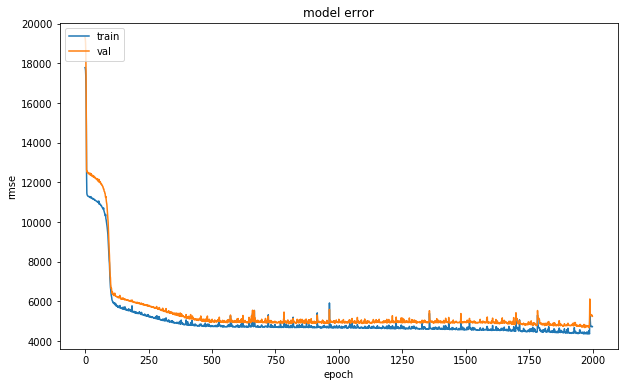

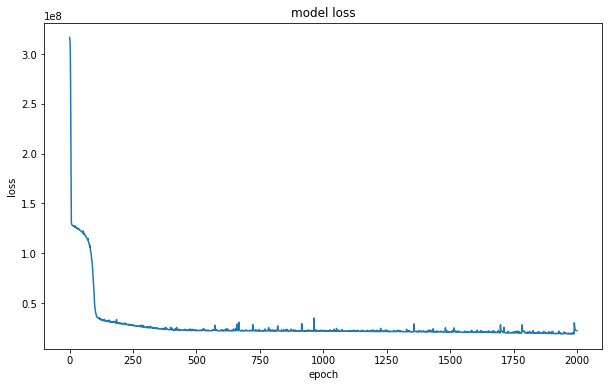

In [50]:
# summarize history for accuracy
plt.plot(np.sqrt(history1.history['mean_squared_error']))
plt.plot(np.sqrt(history1.history['val_mean_squared_error']))
plt.title('model error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# # summarize history for loss
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [51]:
print('')
loss, rmse = model.evaluate(X_val, y_val, verbose=False)
print('Testing RMSE: {:.4f}'.format(np.sqrt(rmse)))


Testing RMSE: 5244.7381


##### Standardized and one-hot encoded

In [35]:
X = X_scaled_onehot_encoded
y = y_

print(X.shape)
print(y.shape)

print('\n{}'.format(X[0]))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

(1338, 11)
(1338,)

[-1.4387642602644821 -0.45332000146019785 -0.9086136674186784 1.0 0.0 0.0
 1.0 0.0 0.0 0.0 1.0]


In [36]:
model = FC_network(X_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 21,633
Trainable params: 21,633
Non-trainable params: 0
_________________________________________________________________


In [37]:
history2 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000, batch_size=100, verbose=False)

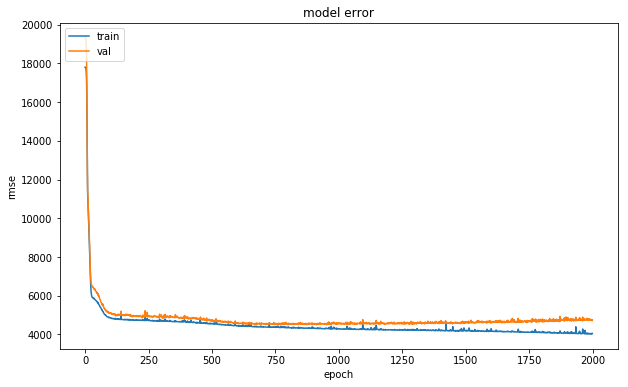

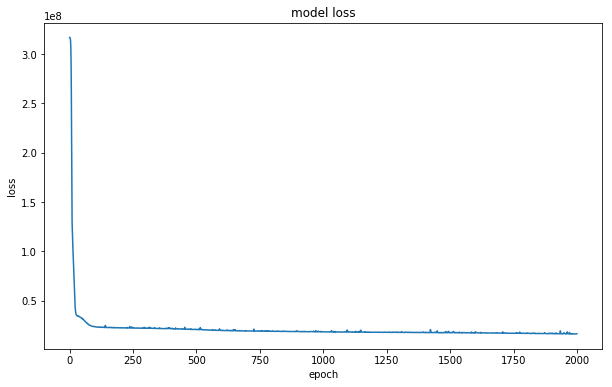

In [38]:
# summarize history for accuracy
plt.plot(np.sqrt(history2.history['mean_squared_error']))
plt.plot(np.sqrt(history2.history['val_mean_squared_error']))
plt.title('model error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# # summarize history for loss
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [39]:
print('')
loss, rmse = model.evaluate(X_val, y_val, verbose=False)
print('Testing RMSE: {:.4f}'.format(np.sqrt(rmse)))


Testing RMSE: 4750.9484


##### Standaridized and one-hot/scalar encoded

In [40]:
X = X_division_scaled_onehot_encoded
y = y_

print(X.shape)
print(y.shape)

print('\n{}'.format(X[0]))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

(1338, 11)
(1338,)

[1 -0.45332000146019785 -0.9086136674186784 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 1.0]


In [41]:
model = FC_network(X_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 21,633
Trainable params: 21,633
Non-trainable params: 0
_________________________________________________________________


In [42]:
history3 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000, batch_size=100, verbose=False)

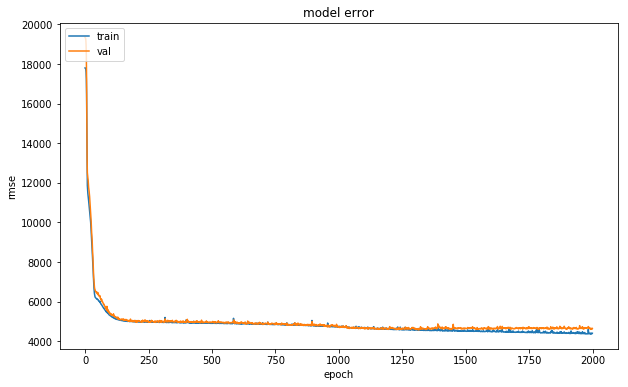

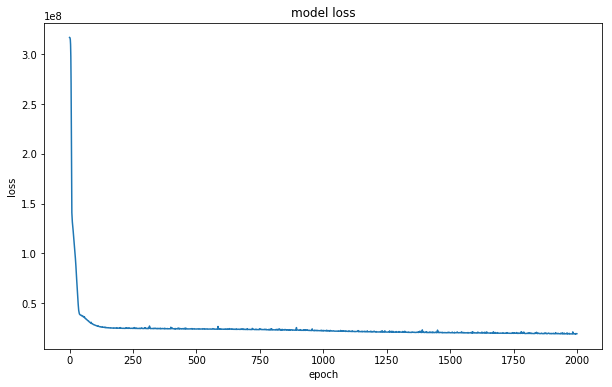

In [43]:
# summarize history for accuracy
plt.plot(np.sqrt(history3.history['mean_squared_error']))
plt.plot(np.sqrt(history3.history['val_mean_squared_error']))
plt.title('model error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# # summarize history for loss
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [44]:
print('')
loss, rmse = model.evaluate(X_val, y_val, verbose=False)
print('Testing RMSE: {:.4f}'.format(np.sqrt(rmse)))


Testing RMSE: 4641.8965


### KNN Regression

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
for n in np.arange(1,11):
    model = KNeighborsRegressor(n_neighbors=n)

    X = X_onehot_encoded
    y = y_

    kf = KFold(n_splits=10, shuffle = True)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    i = 0
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    #     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    #     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
        i = i + 1

    rmse_avg_train = np.average(rmse_per_fold_train)
    rmse_avg_test = np.average(rmse_per_fold_test)

    print('--')
    print('n = {}'.format(n))
    print('RMSE Training average = {}'.format(rmse_avg_train))
    print('RMSE Testing average  = {}'.format(rmse_avg_test))

    model.fit(X, y)
    rmse_val = rmse(model.predict(X), y)
    print('RMSE overall = {}'.format(rmse_val))

--
n = 1
RMSE Training average = 577.6663053692248
RMSE Testing average  = 11648.906264683272
RMSE overall = 625.0098034377368
--
n = 2
RMSE Training average = 5939.716929711065
RMSE Testing average  = 10302.932476688728
RMSE overall = 5882.789386884261
--
n = 3
RMSE Training average = 7024.70340387515
RMSE Testing average  = 10342.106167314932
RMSE overall = 6923.562418225822
--
n = 4
RMSE Training average = 7777.456883928334
RMSE Testing average  = 10246.835791600039
RMSE overall = 7678.094964943909
--
n = 5
RMSE Training average = 8222.115831525065
RMSE Testing average  = 10290.369634463592
RMSE overall = 8141.683840988403
--
n = 6
RMSE Training average = 8534.808326116949
RMSE Testing average  = 10335.794647276878
RMSE overall = 8462.487027743146
--
n = 7
RMSE Training average = 8835.174834100702
RMSE Testing average  = 10430.75417728191
RMSE overall = 8712.247978652735
--
n = 8
RMSE Training average = 9100.05973884717
RMSE Testing average  = 10359.291601028617
RMSE overall = 8983.

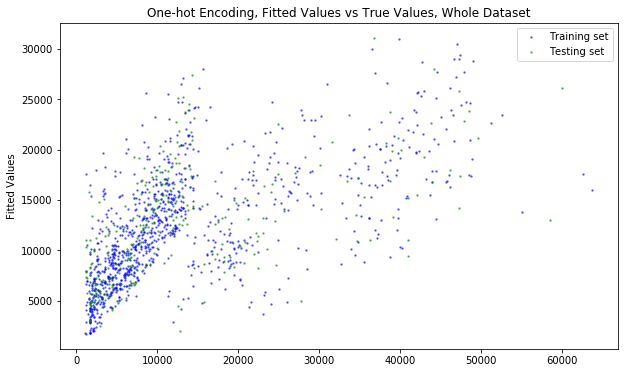

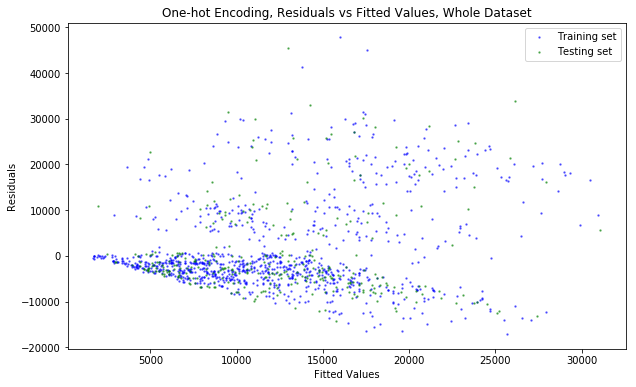

In [30]:
X = X_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), -model.predict(X_train) + y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), -model.predict(X_test) + y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

## Lasso

In [33]:
from sklearn.linear_model import Lasso

/Users/dmwang626/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dmwang626/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dmwang626/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/dmwang626/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objectiv

RMSE Testing for alpha=0.0001 = 6063.643860801567
RMSE Testing for alpha=0.001 = 6063.643714505782
RMSE Testing for alpha=0.01 = 6063.642832437278
RMSE Testing for alpha=0.02 = 6063.642302630144
RMSE Testing for alpha=0.03 = 6063.642384337602
RMSE Testing for alpha=0.04 = 6063.639433117425
RMSE Testing for alpha=0.05 = 6063.639391173719
RMSE Testing for alpha=0.1 = 6063.634968566679
RMSE Testing for alpha=0.5 = 6063.606880305006
RMSE Testing for alpha=1.0 = 6063.6045491496425
RMSE Testing for alpha=2.5 = 6063.556018590864
RMSE Testing for alpha=5.0 = 6063.422653320647
RMSE Testing for alpha=10.0 = 6063.172113372042
RMSE Testing for alpha=50.0 = 6064.878519709199
RMSE Testing for alpha=100.0 = 6069.135481927385
RMSE Testing for alpha=1000.0 = 6574.115208741481
RMSE Testing for alpha=10000.0 = 11501.197786258273


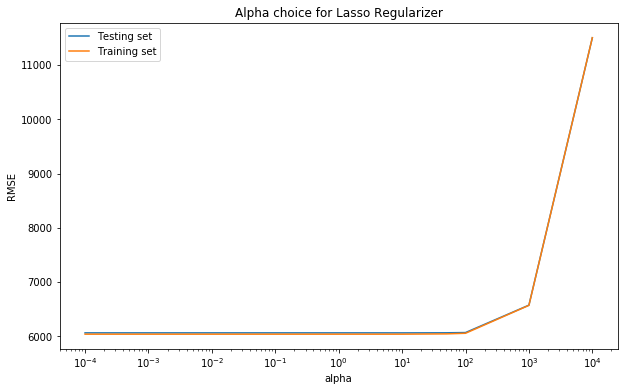

In [34]:
alphas = [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0, 1e3, 1e4]
rmse_avgs = []
rmse_avgs_train = []
X = X_onehot_encoded
y = y_
for alpha in alphas:
    model = Lasso(alpha=alpha)

    kf = KFold(n_splits=10)
    rmse_per_fold_test = []
    rmse_per_fold_train = []
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))

    rmse_avgs.append(np.average(rmse_per_fold_test))
    rmse_avgs_train.append(np.average(rmse_per_fold_train))
    
for idx, alpha in enumerate(alphas):
    print('RMSE Testing for alpha={} = {}'.format(alpha, rmse_avgs[idx]))
    
plt.semilogx(alphas, rmse_avgs)
plt.semilogx(alphas, rmse_avgs_train)
plt.title('Alpha choice for Lasso Regularizer')
plt.ylabel('RMSE')
plt.xlabel('alpha')
l = plt.legend(['Testing set', 'Training set'])
plt.show()

In [40]:
model = Lasso(alpha=0.001)

X = X_onehot_encoded
y = y_

kf = KFold(n_splits=10, shuffle = True)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
#     print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
#     print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1

rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

--
RMSE Training average = 6038.2782884595745
RMSE Testing average  = 6076.230017316211
RMSE overall = 6041.679651176907


/Users/dmwang626/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


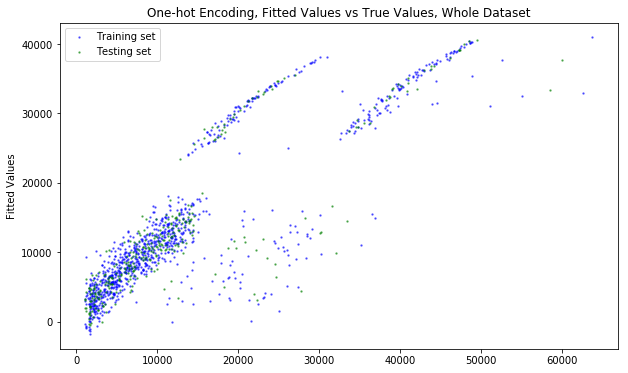

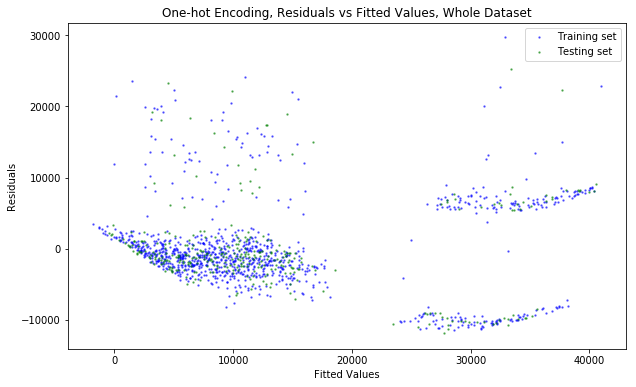

In [41]:
X = X_onehot_encoded
y = y_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)

# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Fitted Values vs True Values, Whole Dataset')
plt.ylabel('True Values')
plt.ylabel('Fitted Values')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), -model.predict(X_train) + y_train, c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), -model.predict(X_test) + y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('One-hot Encoding, Residuals vs Fitted Values, Whole Dataset')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
plt.show()

In [45]:
import os
os.system("say 'I am done with this program. Let's go team!") 

1